# Read Library for Data Modelling (LR)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data_path = ['data']
traindir = ['train']
testdir = ['test']

## For Normal Dataset without Preprocessing

In [2]:
trainpath = os.sep.join(data_path + traindir + ['Train.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,6
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,7
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,6
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,5
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,6
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,6
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6


In [3]:
testpath = os.sep.join(data_path + testdir + ['Test.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,5
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,5
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,6
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,7


In [4]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

## For Multinomial Logistics Regression
- Set "Multi_class" to multinomial.
- list all the solver to {‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’}
- list penalty to {‘l1’, ‘l2’}
- Set C from 1 to 11
- Set max_iter to 20
- random_state to 42

In [5]:
#Now use GridSearch CV to get the best model

#define the model and parameters
lr = LogisticRegression(multi_class = 'multinomial', max_iter = 20, random_state = 42)

parameters = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'penalty' : ['l1','l2'],
              'C' : range(1,11)}

model = GridSearchCV(lr, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

LogisticRegression(C=7, max_iter=20, multi_class='multinomial', random_state=42,
                   solver='newton-cg')

              precision    recall  f1-score   support

           3     1.0000    0.1429    0.2500         7
           4     0.0000    0.0000    0.0000        40
           5     0.5284    0.4812    0.5037       426
           6     0.5136    0.7650    0.6146       668
           7     0.4419    0.1357    0.2077       280
           8     0.0000    0.0000    0.0000        49

    accuracy                         0.5136      1470
   macro avg     0.4140    0.2541    0.2626      1470
weighted avg     0.4754    0.5136    0.4660      1470



Text(0.5, 1.0, 'Confusion Matrix')

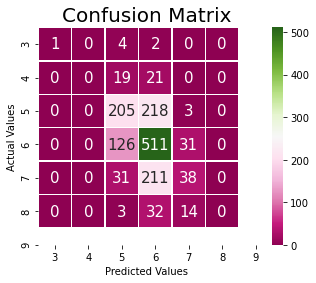

In [6]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels = range(3,10), yticklabels=range(3,10));
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

# 51.36%? Too Weak!!
## Use Modified Dataset (Binary)

In [2]:
trainpath = os.sep.join(data_path + traindir + ['Train_Modified.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,Poor
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,Good
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,Poor
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,Poor
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,Poor
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,Poor
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,Poor
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,Poor


In [3]:
testpath = os.sep.join(data_path + testdir + ['Test_Modified.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,Good
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,Good
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,Good
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,Poor
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,Poor
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,Poor
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,Poor
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,Good


## For Target Variables , you need to convert object to number
- Good to 1
- Poor to 0
- We can use LabelEncoder to convert

In [4]:
le = LabelEncoder()
traindf['quality'] = le.fit_transform(traindf.quality)
traindf.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,1
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,0
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,1
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,1
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,1


In [5]:
le = LabelEncoder()
testdf['quality'] = le.fit_transform(testdf.quality)
testdf.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,0
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,0
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,0
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,1
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,0


In [6]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

# Try to use Default Parameter

              precision    recall  f1-score   support

           0     0.6182    0.2067    0.3098       329
           1     0.8081    0.9632    0.8788      1141

    accuracy                         0.7939      1470
   macro avg     0.7131    0.5849    0.5943      1470
weighted avg     0.7656    0.7939    0.7515      1470



Text(0.5, 1.0, 'Confusion Matrix')

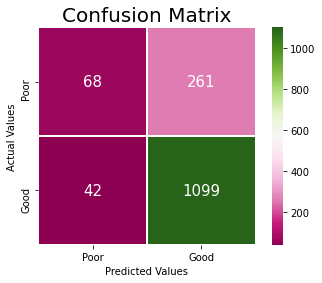

In [7]:
lr = LogisticRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

## For Binary Logistics Regression
- Set "Multi_class" to ovr.
- list all the solver to {‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’}
- list penalty to {‘l1’, ‘l2’}
- Set C from 1 to 11
- Set max_iter to 20
- random_state to 42

In [13]:
#Now use GridSearch CV to get the best model

#define the model and parameters
lr = LogisticRegression(multi_class = 'ovr', max_iter = 20, random_state = 42)

parameters = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'penalty' : ['l1','l2'],
              'C' : range(1,11)}

model = GridSearchCV(lr, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

LogisticRegression(C=6, max_iter=20, multi_class='ovr', random_state=42,
                   solver='newton-cg')

              precision    recall  f1-score   support

           0     0.6106    0.2097    0.3122       329
           1     0.8084    0.9614    0.8783      1141

    accuracy                         0.7932      1470
   macro avg     0.7095    0.5856    0.5953      1470
weighted avg     0.7641    0.7932    0.7516      1470



Text(0.5, 1.0, 'Confusion Matrix')

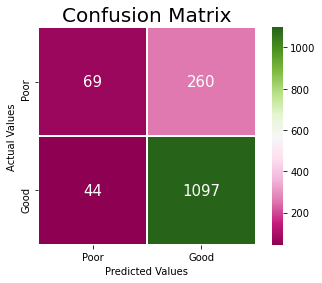

In [14]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

## 79.32%, Close to 80%?
- Try to use StandardScalar for all features

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
#Now use GridSearch CV to get the best model

#define the model and parameters
lr = LogisticRegression(multi_class = 'ovr', max_iter = 20, random_state = 42)

parameters = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'penalty' : ['l1','l2'],
              'C' : range(1,11)}

model = GridSearchCV(lr, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

LogisticRegression(C=5, max_iter=20, multi_class='ovr', random_state=42,
                   solver='saga')

              precision    recall  f1-score   support

           0     0.5616    0.2492    0.3453       329
           1     0.8134    0.9439    0.8738      1141

    accuracy                         0.7884      1470
   macro avg     0.6875    0.5966    0.6095      1470
weighted avg     0.7571    0.7884    0.7555      1470



Text(0.5, 1.0, 'Confusion Matrix')

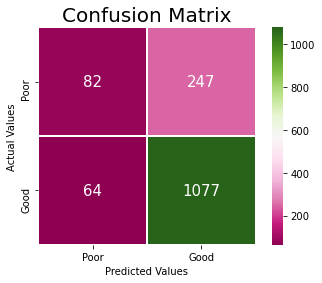

In [17]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

## Can't Improve? 
- Reduce Features to only Density and Alcohol

In [23]:
X_train = traindf[['density','alcohol']]
X_test = testdf[['density','alcohol']]
y_train = traindf["quality"]
y_test = testdf["quality"]

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
#Now use GridSearch CV to get the best model

#define the model and parameters
lr = LogisticRegression(multi_class = 'ovr', max_iter = 20, random_state = 42)

parameters = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'penalty' : ['l1','l2'],
              'C' : range(1,11)}

model = GridSearchCV(lr, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

LogisticRegression(C=1, max_iter=20, multi_class='ovr', random_state=42,
                   solver='newton-cg')

              precision    recall  f1-score   support

           0     0.5649    0.2249    0.3217       329
           1     0.8096    0.9500    0.8742      1141

    accuracy                         0.7878      1470
   macro avg     0.6872    0.5875    0.5980      1470
weighted avg     0.7548    0.7878    0.7505      1470



Text(0.5, 1.0, 'Confusion Matrix')

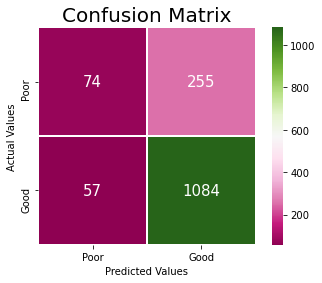

In [32]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

## Can't Improve, Overall Logistics Regression = 79.32%
- show parameters of features

In [38]:
#Now use GridSearch CV to get the best model

#define the model and parameters
lr = LogisticRegression(multi_class = 'ovr', max_iter = 20, random_state = 42)

parameters = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'penalty' : ['l1','l2'],
              'C' : range(1,11)}

model = GridSearchCV(lr, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

LogisticRegression(C=6, max_iter=20, multi_class='ovr', random_state=42,
                   solver='newton-cg')

              precision    recall  f1-score   support

        Good     0.5965    0.2067    0.3070       329
        Poor     0.8075    0.9597    0.8771      1141

    accuracy                         0.7912      1470
   macro avg     0.7020    0.5832    0.5920      1470
weighted avg     0.7603    0.7912    0.7495      1470



Text(0.5, 1.0, 'Confusion Matrix')

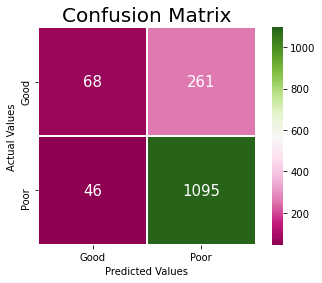

In [15]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Good", "Poor"], yticklabels=["Good", "Poor"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

In [44]:
model.best_estimator_.coef_

array([[ 0.18700347,  3.25690086,  0.839246  , -0.03018555,  0.84749165,
        -0.01406098,  0.00568975,  2.66777598,  0.7097082 , -1.32666002,
        -0.76783545]])

In [45]:
model.best_estimator_.intercept_

array([2.77008321])